In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.parse
# import re

data_raw = pd.read_csv('data/raw/output.csv')
data = data_raw.copy()


# Drop duplicates based on columns
data = data.drop_duplicates(subset=[
    # "Property ID",
    "External reference",
    "Address",
    "Reference number of the EPC report"
])

# Drop specific columns
data = data.drop(columns=["Url", "External reference", "Property ID", "Type of sale", "Address", "Tenement building", "Swimming pool"])

# Dropping order is important:
# data = data.dropna(axis=1, thresh=data.shape[0] * 0.7) # Drop columns first
# data = data.dropna(axis=0, thresh=data.shape[1] * 1.0) # Drop rows



# Rename specific columns, clean some text values
data.rename(columns={"How many fireplaces?": "Fireplace"}, inplace=True)

data['Locality name'] = data['Locality name'].apply(urllib.parse.unquote)

data["Price"] = data["Price"].str.replace("€", "")
try:
    data["Price"] = data["Price"].str.replace("Starting price : ", "")
    data["Price"] = data["Price"].astype(int)
except:
    data = data[~data["Price"].str.contains(r'\d+\s+per\s+month')]
    data["Price"] = data["Price"].str.replace(r'\D', '').astype(int)



# Creating price categories
bins = pd.cut(
    x = data["Price"],
    bins=[0, 100000, 500000, 1000000, data["Price"].max()+1],
    labels=["low", "medium", "high", "exorbitant"]
)
data["Price bins"] = bins



# Value remapping
energy_class_mapping = {
    "G": 0,
    "F": 1,
    "F_C": 1,
    "E": 2,
    "D": 3,
    "C": 4,
    "B": 5,
    "A": 6,
    "A+": 7,
    "A++": 8,
    "A+++": 9,
}

data["Energy class"] = data["Energy class"].map(energy_class_mapping)



# Display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)



C:\Users\Huraqan\AppData\Local\Temp\ipykernel_6088\3589555112.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('data/raw/output.csv')


# We have 40 attributes but we're keeping only 15:

In [34]:

print("Data raw shape:", data_raw.shape)
print("Data cleaned shape:", data.shape)

total_rows = len(data_raw)
series = data_raw.isna().sum()
series = series.sort_values(ascending=True)
percentage_series = (series / total_rows) * 100
display(percentage_series)


Data raw shape: (18095, 40)
Data cleaned shape: (17176, 34)


Url                                            0.00
How many fireplaces?                           0.00
Furnished                                      0.00
Kitchen type                                   0.00
Type of sale                                   0.00
Subtype of property                            0.00
Swimming pool                                  0.00
Price                                          0.00
Postal code                                    0.00
Locality name                                  0.00
Property ID                                    0.00
Type of property                               0.00
Tenement building                              1.23
Bedrooms                                       2.75
Address                                        3.77
Living area                                    8.24
Bathrooms                                     10.47
External reference                            10.84
Energy class                                  19.05
Number of fr

# KEEPING ONLY:
'Locality name', 'Postal code', 'Price', 'Type of property', 'Subtype of property', 'Bedrooms', 'Living area', 'Kitchen type', 'Furnished', 'Fireplace', 'Energy class', 'Price bins' 
because we find them most reliable

In [35]:

data

,Locality name,Postal code,Price,Type of property,Subtype of property,Bedrooms,Living area,Kitchen type,Furnished,Fireplace,...,Primary energy consumption,Energy class,Reference number of the EPC report,CO₂ emission,Yearly theoretical total energy consumption,Subdivision permit,Possible priority purchase right,Flood zone type,Latest land use designation,Price bins
0,vielsalm,6690,244000,house,house,3.00,104.00,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",medium
1,lebbeke,9280,699000,house,house,6.00,NaN,1,0,0,...,238.00,4.00,20231201-0003051650-RES-2,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",high
2,hamme,9220,290000,house,house,4.00,151.00,1,0,0,...,631.00,1.00,20230303_0002822017_RES_2,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",medium
3,gent,9000,670000,apartment,kot,7.00,285.00,1,0,0,...,159.00,5.00,20210410-0002393666-RES-1,NaN,NaN,0.00,0.00,Non flood zone,NaN,high
4,westende,8434,148000,apartment,flat-studio,NaN,34.00,1,1,0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,Non flood zone,NaN,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18089,lier,2500,990000,house,house,9.00,617.00,1,0,0,...,NaN,NaN,20231031-0010691368-NR-1,NaN,NaN,0.00,1.00,Non flood zone,"Living area (residential, urban or rural)",high
18091,lier,2500,375000,house,house,4.00,251.00,1,0,0,...,383.00,3.00,20190718-0002178963-RES-2,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",medium
18092,lier,2500,249000,house,house,1.00,63.00,1,0,0,...,421.00,2.00,NaN,NaN,NaN,0.00,0.00,Non flood zone,Extended residential area,medium
18093,lier,2500,275000,house,house,3.00,146.00,1,0,0,...,320.00,3.00,20211210-0002507558-RES-1,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",medium


# There are 10 numeric fields and 5 string types:

In [37]:

numerical_cols : list = data.select_dtypes(include=["float", "int"]).columns
numerical_data = pd.DataFrame()
numerical_data[numerical_cols] = data[numerical_cols]
numerical_data.drop(columns=["Kitchen type", "Furnished", "Fireplace"], inplace=True)
print(f"Numerical fields only: {numerical_data.shape}\n")
print(numerical_data.dtypes)

Numerical fields only: (17176, 18)

Price                                 int32
Bedrooms                            float64
Living area                         float64
Terrace surface                     float64
Garden surface                      float64
Surface of the plot                 float64
Number of frontages                 float64
Construction year                   float64
Number of floors                    float64
Bedroom 1 surface                   float64
Bedroom 2 surface                   float64
Bedroom 3 surface                   float64
Bathrooms                           float64
Toilets                             float64
Primary energy consumption          float64
Energy class                        float64
Subdivision permit                  float64
Possible priority purchase right    float64
dtype: object


# Many outliers but the worst ones are:
Bedrooms, bathrooms, primary energy consumption and even the price.

Castles are rare yet they skew the data analysis quite a bit.

# General overview:

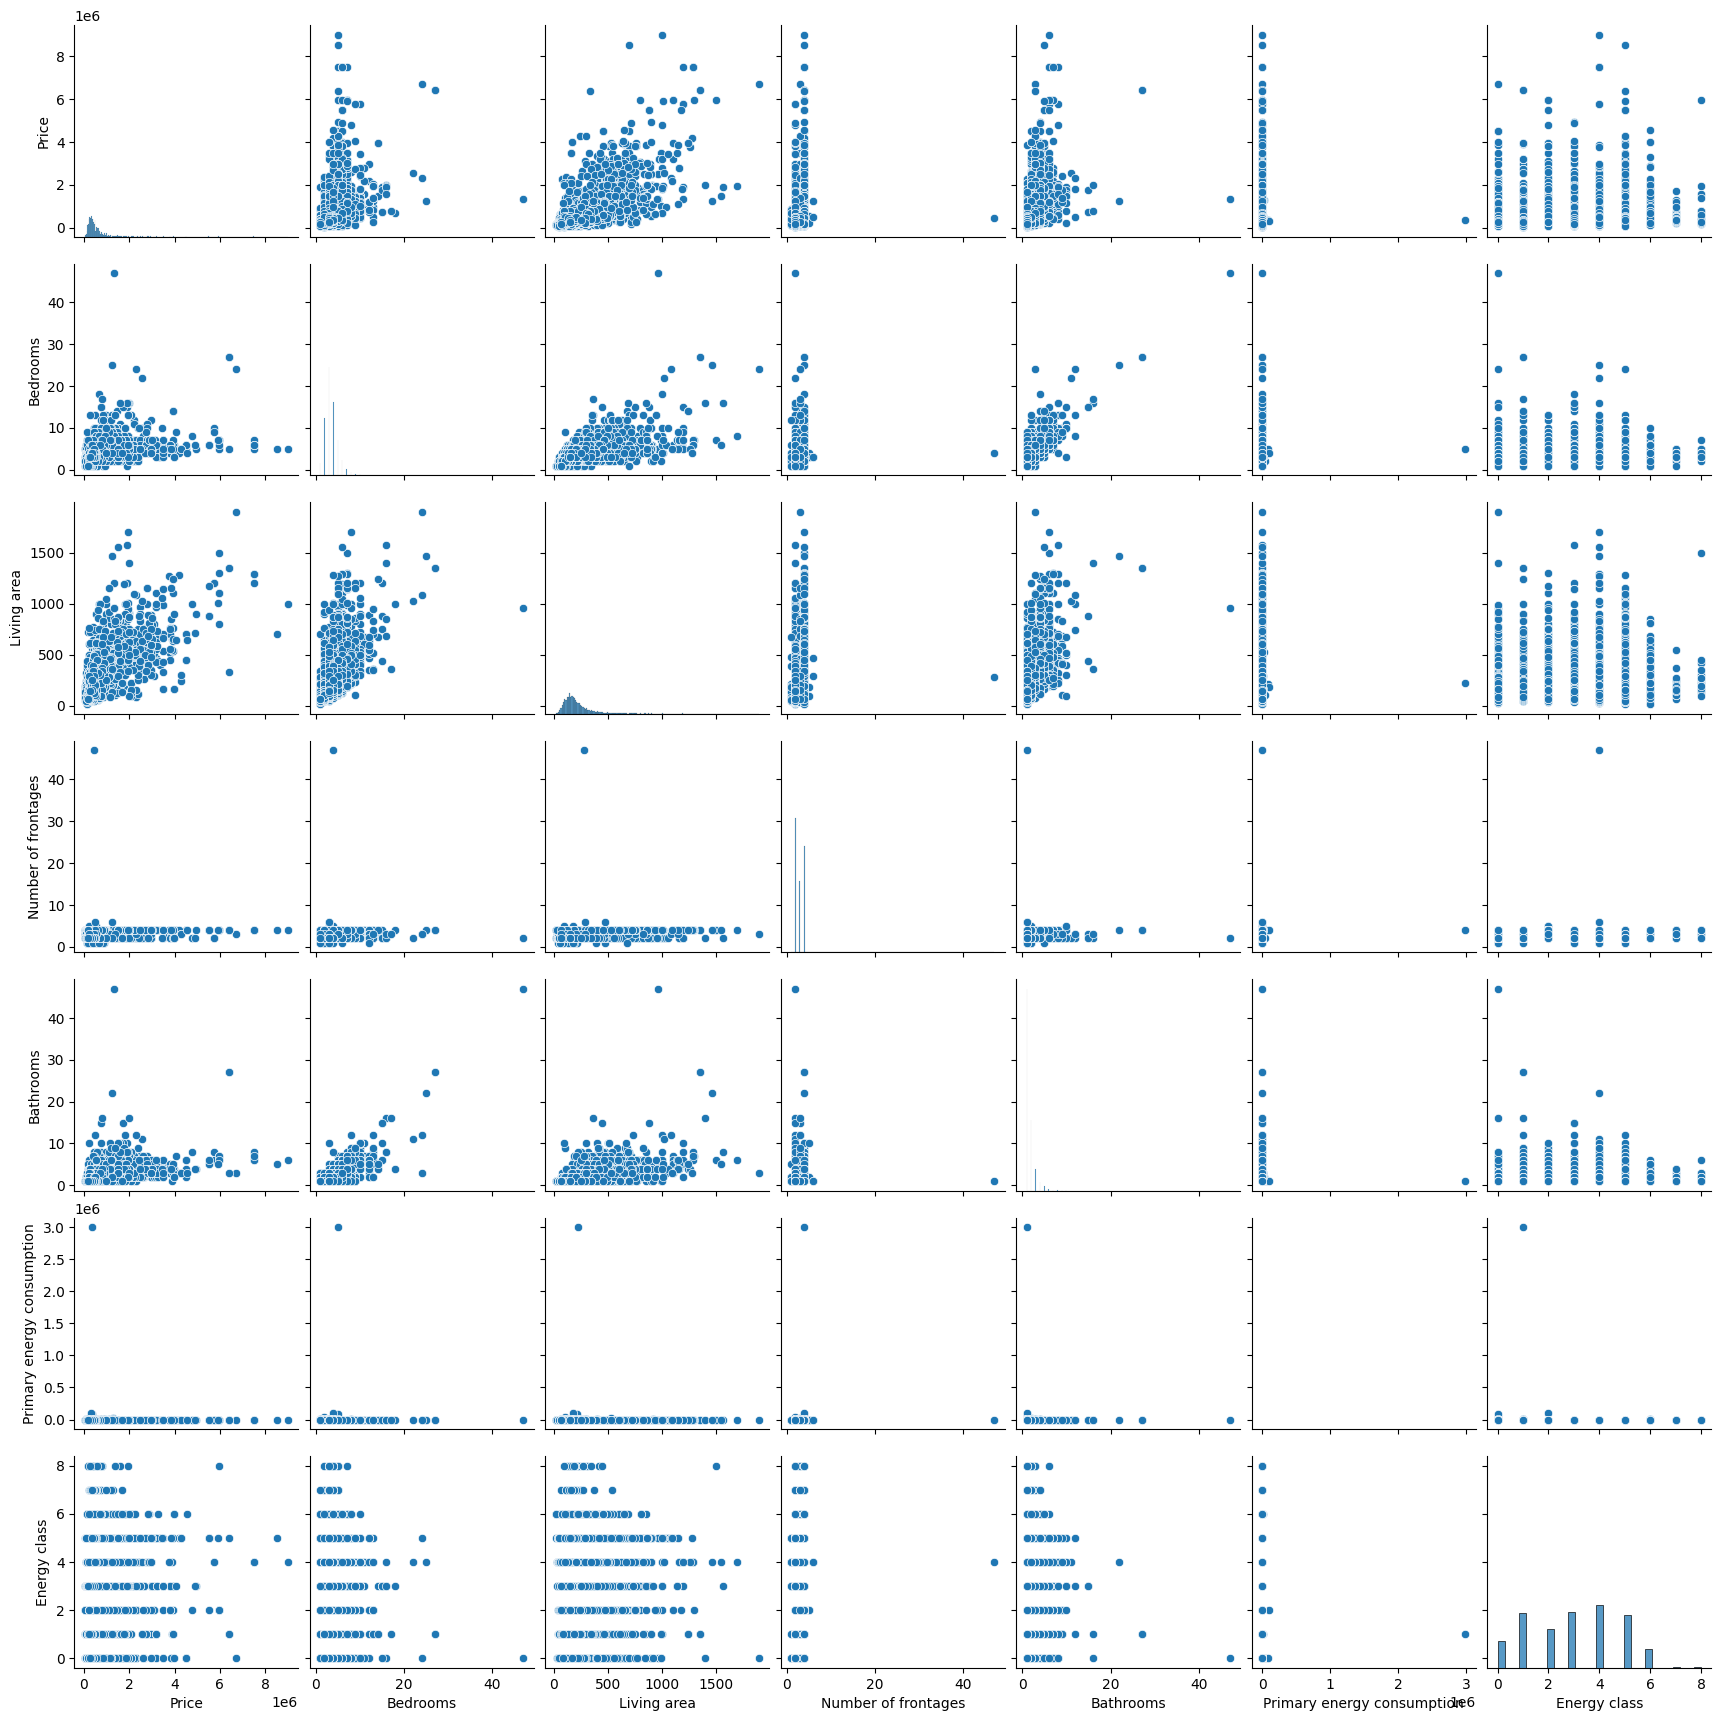

In [5]:

sns.pairplot(numerical_data)

# IQR for handling outliers

In [40]:

# IQR Outlier deletion
print("Old Shape: ", numerical_data.shape)

numerical_data_IQR = numerical_data.copy()

# for column in numerical_data.columns:
for column in [
    # "Price",
    "Primary energy consumption",
    "Bedrooms",
    "Living area",
    "Bathrooms",
    "Number of frontages",
    "Energy class",
    ]:
    previous_count = numerical_data_IQR.shape[0]
    
    # IQR
    # Calculate the upper and lower limits
    Q1 = numerical_data_IQR[column].quantile(0.15)
    Q3 = numerical_data_IQR[column].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(numerical_data_IQR[column] >= upper)[0]
    lower_array = np.where(numerical_data_IQR[column] <= lower)[0]
    full_array = np.concatenate((upper_array, lower_array))
    
    # Removing the outliers
    numerical_data_IQR = numerical_data_IQR.drop(index=numerical_data_IQR.index[upper_array])

    print(f"\nRows removed from {column}:", previous_count - numerical_data_IQR.shape[0])
    print("upper outliers:", len(upper_array))
    # print("lower outliers:", len(lower_array))
    # print("lower values:", numerical_data_IQR[column].iloc[lower_array])

print("\nNew Shape: ", numerical_data_IQR.shape)

Old Shape:  (17176, 18)

Rows removed from Primary energy consumption: 20
upper outliers: 20

Rows removed from Bedrooms: 98
upper outliers: 98

Rows removed from Living area: 90
upper outliers: 90

Rows removed from Bathrooms: 159
upper outliers: 159

Rows removed from Number of frontages: 4
upper outliers: 4

Rows removed from Energy class: 0
upper outliers: 0

New Shape:  (16805, 18)


# General overview: no outliers

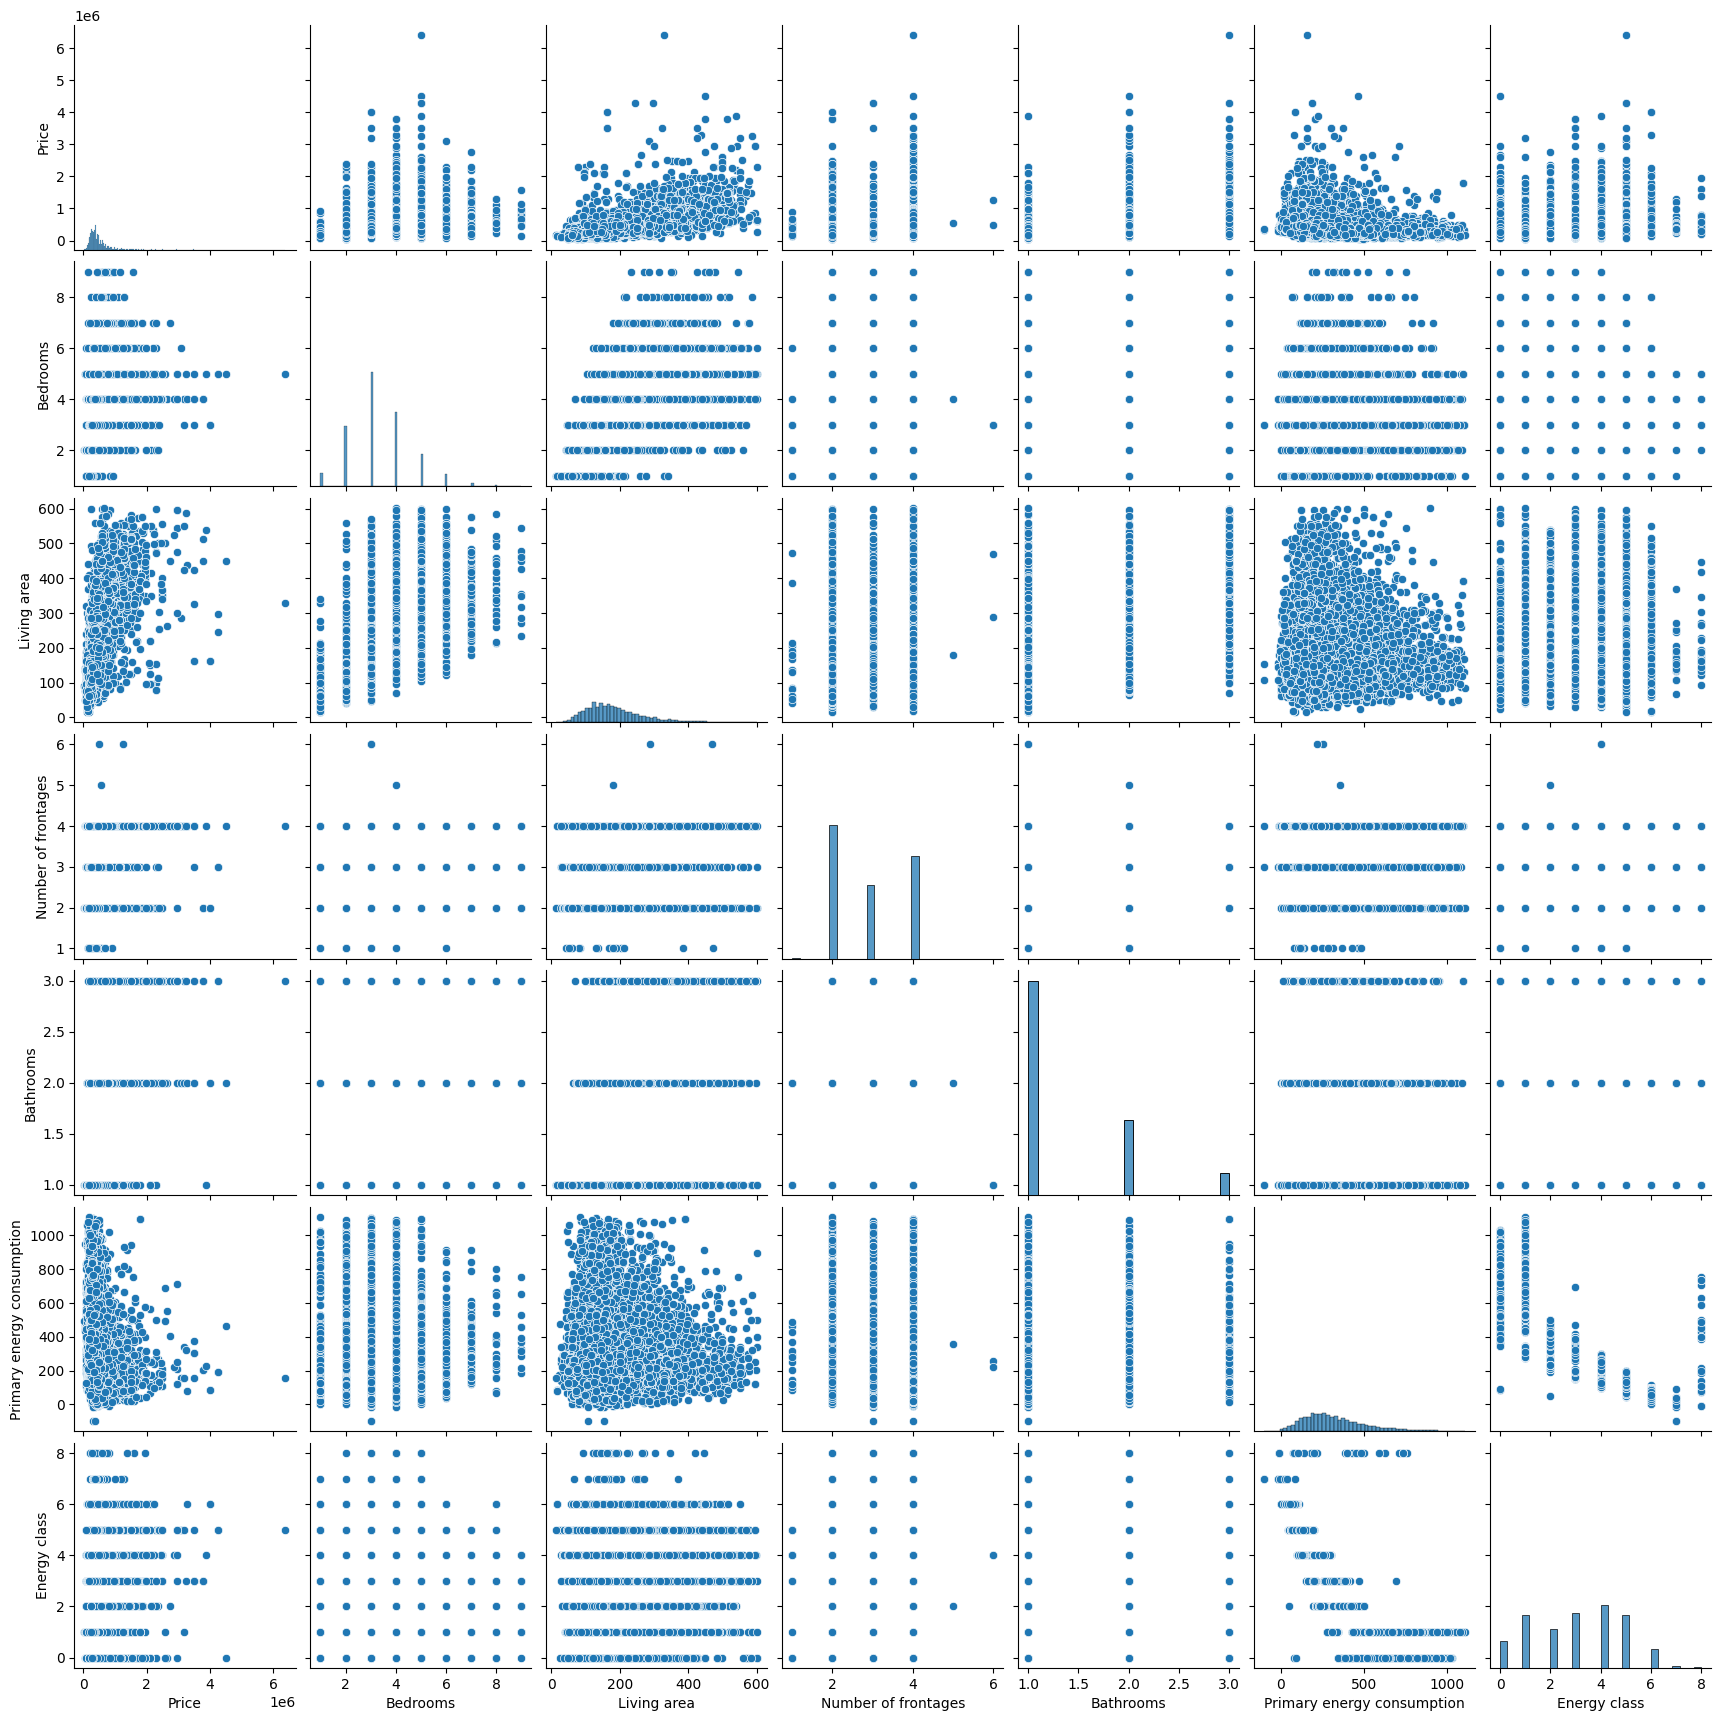

In [7]:

sns.pairplot(numerical_data_IQR)

# How do these fields correlate?

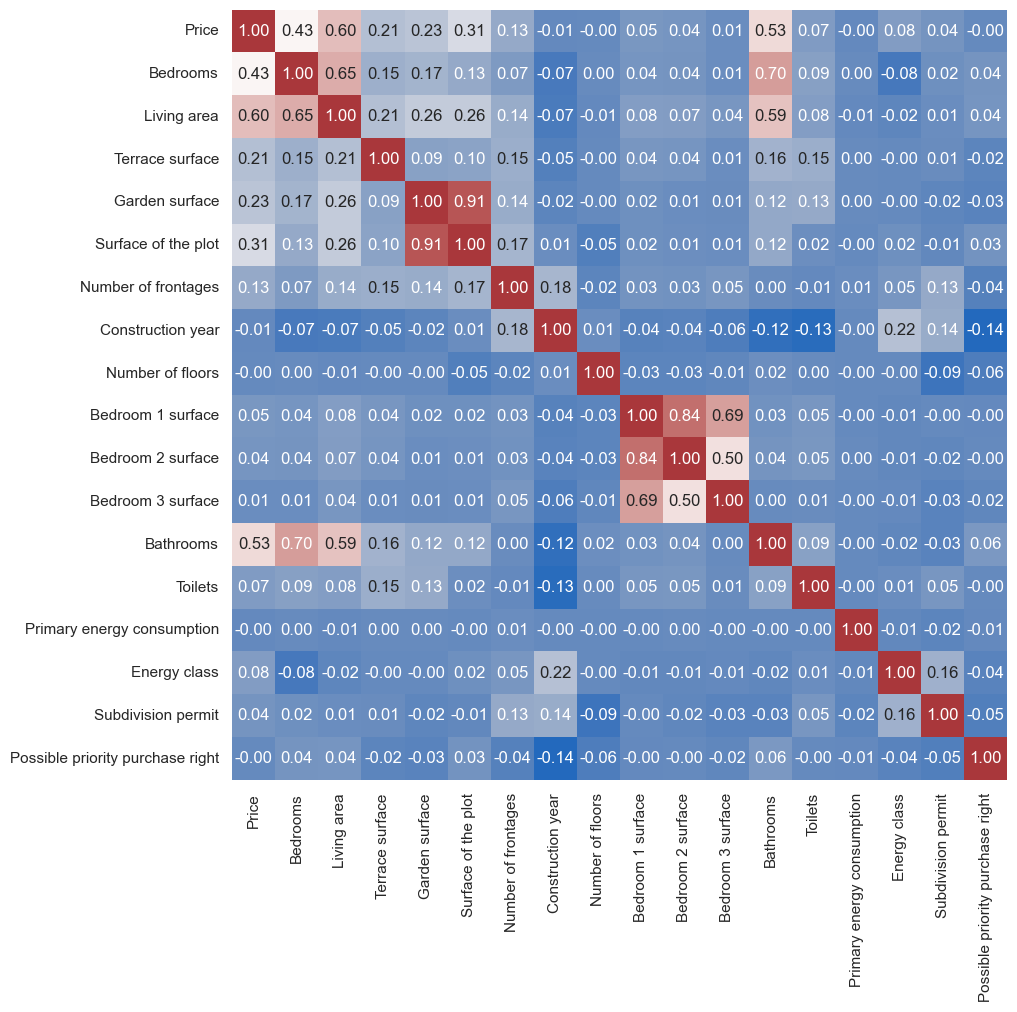

In [42]:

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_data.corr(), annot=True, cbar=False, cmap="vlag", fmt=".2f")
plt.show()

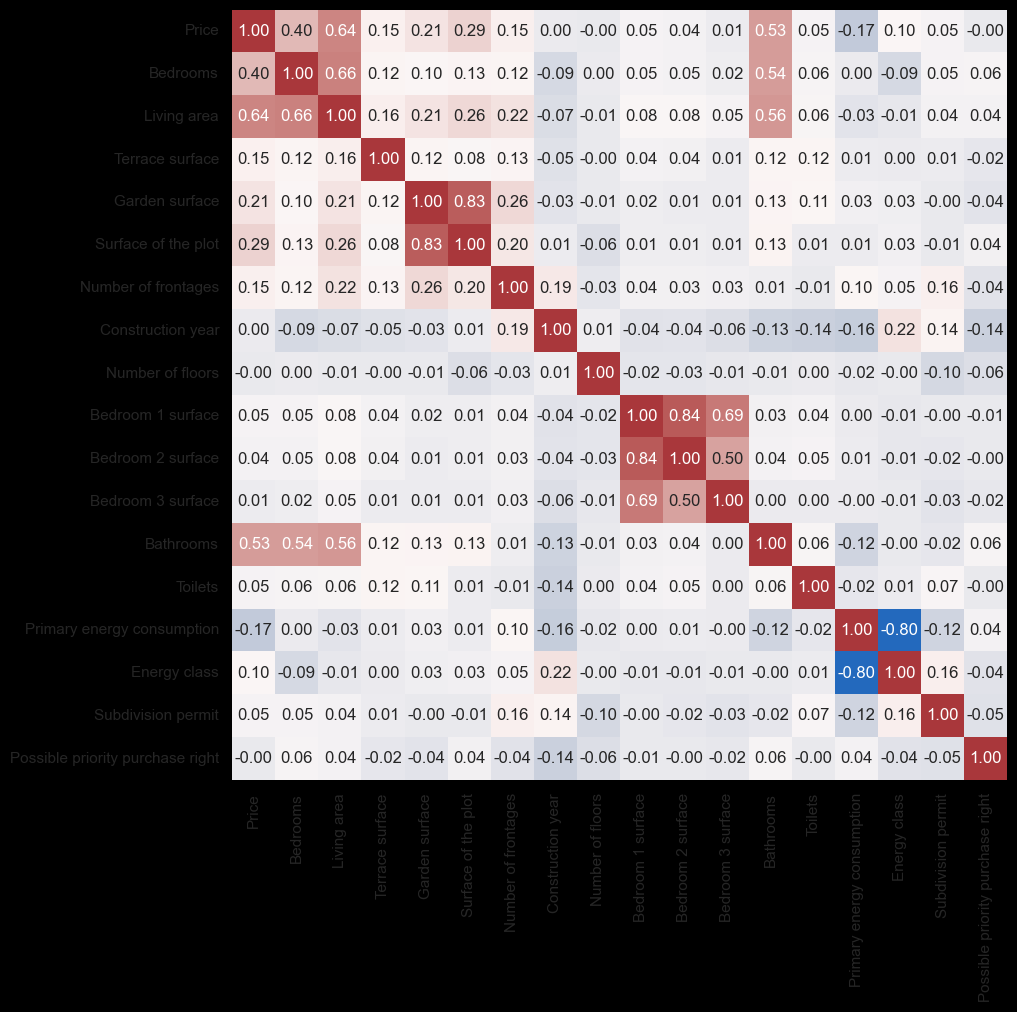

In [43]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 10), facecolor="black")
map = sns.heatmap(numerical_data_IQR.corr(), annot=True, cbar=False, cmap="vlag", fmt=".2f")


# cbar = map.collections[0].colorbar
# cbar.set_label('Correlation', color='blue')  # Change 'blue' to any other color you prefer
# cbar.ax.yaxis.set_tick_params(color='red')

plt.show()

# Provinces

In [77]:
data_provinces = data.copy()

provinces = {
    "Antwerp": "2000-2999",
    "Brussels": "1000-1299",
    "East Flanders": "9000-9999",
    "Flemish Brabant": ["1500-1999", "3000-3499"],
    "Hainaut": ["6000-6599", "7000-7999"],
    "Liege": "4000-4999",
    "Limburg": "3500-3999",
    "Luxembourg": "6600-6900",
    "Namur": "5000-5999",
    "Walloon Brabant": "1300-1499",
    "West Flanders": "8000-8999"
}
for index, postal_code in data_provinces["Postal code"].items():
    for province, postal_range in provinces.items():
        if isinstance(postal_range, list):
            for range_str in postal_range:
                range_start, range_end = map(int, range_str.split("-"))
                if postal_code in range(range_start, range_end + 1):
                    data_provinces.loc[index, "Provinces"] = province
        else:
            range_start, range_end = map(int, postal_range.split("-"))
            if postal_code in range(range_start, range_end + 1):
                data_provinces.loc[index, "Provinces"] = province


# Calculate the average price per locality
# Assuming data_provinces contains the necessary columns like 'Provinces', 'Price', etc.

# Calculate the average price per locality
localities = data_provinces.groupby('Provinces')
average_price_per_locality = localities['Price'].mean()

# Create a DataFrame to display the results
average_price = pd.DataFrame({'Province': average_price_per_locality.index, 'Average price': average_price_per_locality.values})
average_price.head(10)



# Calculate the average price per locality
localities = data.groupby("Province")
average_price_per_locality = localities["Price"].mean()

# Create a DataFrame to display the results
average_price = pd.DataFrame({"Province": average_price_per_locality.index, "Average price": average_price_per_locality.values})
average_price.head(10)

display(data)


,Locality name,Postal code,Price,Type of property,Subtype of property,Bedrooms,Living area,Kitchen type,Furnished,Fireplace,Number of frontages,Bathrooms,Primary energy consumption,Energy class,Price bins,Province
2,hamme,9220,290000,house,house,4.00,151.00,1,0,0,3.00,1.00,631.00,1,medium,East Flanders
3,gent,9000,670000,apartment,kot,7.00,285.00,1,0,0,2.00,1.00,159.00,5,high,East Flanders
5,sint-pieters-woluwe,1150,649000,house,house,4.00,175.00,1,0,0,2.00,2.00,257.00,2,high,Brussels
6,saint-amand,6221,180000,house,house,2.00,151.00,1,0,0,3.00,1.00,798.00,0,medium,Hainaut
7,mechelen,2800,235000,house,house,4.00,152.00,1,0,0,2.00,2.00,440.00,2,medium,Antwerp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18087,lier,2500,349000,house,town-house,3.00,149.00,1,0,0,2.00,1.00,193.00,5,medium,Antwerp
18091,lier,2500,375000,house,house,4.00,251.00,1,0,0,2.00,1.00,383.00,3,medium,Antwerp
18092,lier,2500,249000,house,house,1.00,63.00,1,0,0,3.00,1.00,421.00,2,medium,Antwerp
18093,lier,2500,275000,house,house,3.00,146.00,1,0,0,2.00,1.00,320.00,3,medium,Antwerp


How are the number of properties distributed according to their surface?


In [ ]:
plt.figure(figsize=(10, 6))


sns.pointplot(data=average_price, x="Province", y="Average price")
plt.xlabel("Province")
plt.ylabel("Average price per Province")
plt.title("Distribution of Prices by Locality Postal Code")

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique investment types
investment_types = data['Price bins'].unique()

# Create subplots and figure
fig, axes = plt.subplots(len(investment_types), 1, figsize=(10, 10))

# Iterate over investment types
for i, investment_type in enumerate(investment_types):
    df_filtered = data[data['Price bins'] == investment_type]  # Filter data

    sns.histplot(
        data=df_filtered,
        x="Price",
        hue="Postal code",
        kde=True,
        common_bins=True,
        ax=axes[i]
    )

    # Subplot titles
    axes[i].set_title(investment_type)

# Shared title for all subplots
plt.suptitle("Price Distribution by Investment Type and Region")

# Adjust spacing and show
plt.tight_layout()
plt.show()


C:\Users\Huraqan\AppData\Local\Temp\ipykernel_6088\2676392745.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Huraqan\AppData\Local\Temp\ipykernel_6088\2676392745.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\Huraqan\Octocat\github\oracle-estate\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 